# Homework 11

**1. Build a classification tree on the Titanic data using `Survived` as the outcome and `Sex, Pclass, Age, PassengerId` as explanatory variables**
- Explore various values (1-4) of `max_depth` and describe when you feel that overfitting sets in
- For `max_depth`=2: would you split the leaf which contains women of Pclass 1 and 2 further ? Compute the impurity gain!
    
**import libraries**

In [83]:
import pandas as pd
import numpy as np
#import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

**load the titanic dataframe**

In [84]:
df = pd.read_csv('../data/TitanicTrain.csv')
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [85]:
# Label encode sex
LE = LabelEncoder()
df['Sex'] = LE.fit_transform(df['Sex'])

In [36]:
# Impute Nan in Age
Imp = SimpleImputer()
df['Age'] = Imp.fit_transform(df[['Age']])

In [115]:
X = df[["PassengerId", "Sex", "Pclass", "Age"]]
y = df.Survived

In [116]:
best_tree.classes_

array([0, 1])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

### Modeling

In [63]:
max_depths = np.arange(1,5)
cv_accs = []
tree_models = []

for value in max_depths:

    tree = DecisionTreeClassifier(max_depth=value)
    tree_models.append(tree.fit(X_train,y_train))
    cv_accs.append(np.mean(cross_val_score(tree, X_train, y_train, cv=5)))

opt_depth = max_depths[np.argmax(cv_accs)]
opt_depth

1

In [64]:
cv_accs

[0.7978193548387097,
 0.7672516129032259,
 0.7800645161290323,
 0.7736516129032258]

In [105]:
best_tree = tree_models[opt_depth-1]

y_pred = best_tree.predict(X_test)

accuracy_score(y_test, y_pred)

0.7611940298507462

### Plot trees

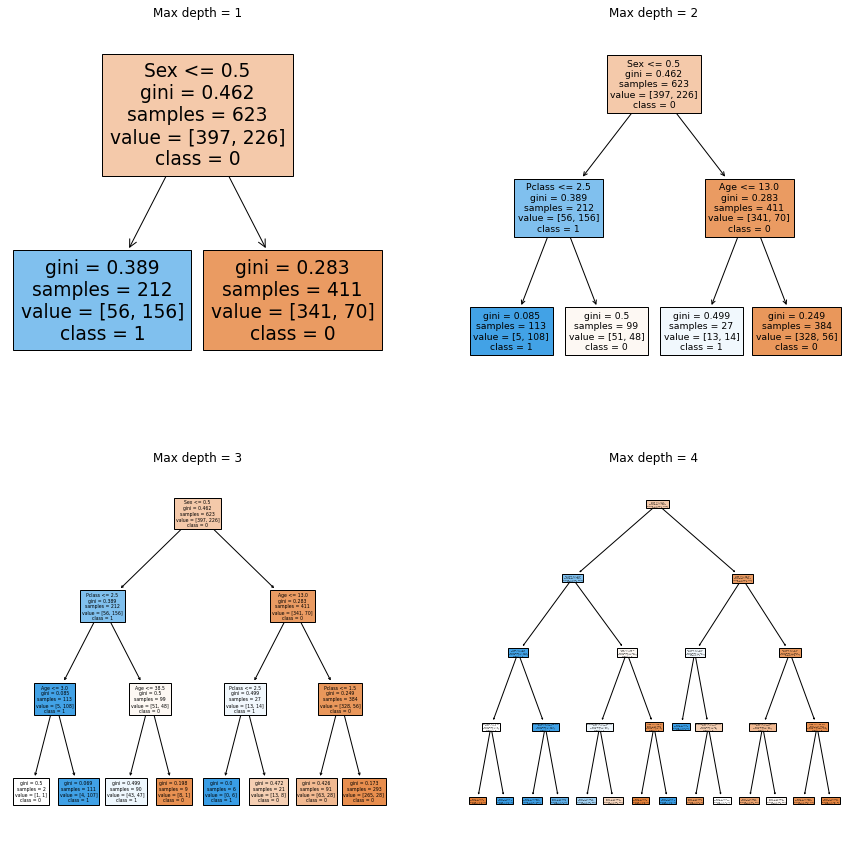

In [118]:
fig, axes = plt.subplots(2,2,figsize=(15,15))

for i in range(0,4):
    if i <=1: 
        plot_tree(tree_models[i],
                  feature_names=X.columns,  
                  class_names=["0","1"],
                  filled=True,
                  ax=axes[0,i]);
        axes[0,i].set_title(f"Max depth = {i+1}")
    plot_tree(tree_models[i],
          feature_names=X.columns,  
          class_names=["0","1"],
          filled=True,
          ax=axes[1,i-2]);
    axes[1,i-2].set_title(f"Max depth = {i+1}")

I feel like overfitting sets in at `max_depths= 3`. At this point some notes only have a relative small sample size 


## Task 2

For `max_depth`=2: would you split the leaf which contains women of Pclass 1 and 2 further (Note #2)? Compute the impurity gain!

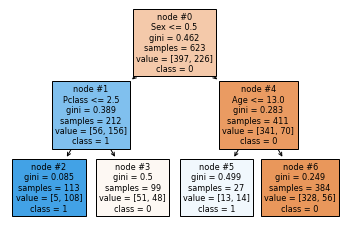

In [124]:
plot_tree(tree_models[1],
            feature_names=X.columns,  
            class_names=["0","1"],
            filled=True,
            node_ids=True);

In [121]:
LE.classes_

array(['female', 'male'], dtype=object)

In [134]:
df_train = pd.concat([X_train,pd.DataFrame(y_train)],axis=1)

In [135]:
df_train.columns

Index(['PassengerId', 'Sex', 'Pclass', 'Age', 'Survived'], dtype='object')

In [138]:
df_fpc12 = df_train[(df_train["Pclass"]!=3) & (df_train["Sex"]==0) ]

In [164]:
sample_sizes =df_fpc12.Pclass.value_counts()

In [155]:
surv_prob = df_fpc12.groupby("Pclass")[["Survived"]].mean()
surv_prob

,Survived
Pclass,
1,0.953846
2,0.958333


In [165]:
giniParent = 0.085
samplesParent = df_fpc12.shape[0] #113
n_pc1 = sample_sizes[1]
n_pc2 = sample_sizes[2]
p_pc1 = surv_prob.iloc[0,0] 
p_pc2 = surv_prob.iloc[1,0] 

In [166]:
gini_pc1 = 2*(p_pc1*(1-p_pc1))
gini_pc2 = 2*(p_pc2*(1-p_pc2))

In [167]:
gini_reduction = giniParent -(gini_pc1*n_pc1/samplesParent+gini_pc2*n_pc2/samplesParent)
gini_reduction

0.0004299977308827724

I would not split between pc1 and pc2 for female passengers, because the impurity gain is very small. 